In [20]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

In [97]:
# TODO: sheet_name change
original_df= pd.read_excel('test.xlsx', sheet_name='Taxv3')
original_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Community,NaN,NaN,NaN,NaN,NaN,Governance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Membership,NaN,NaN,NaN,NaN,Meta Information,Token,NaN,...,Setup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,DAOs,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,...,Initial Airdrop,Initial Token Sale,NaN,NaN,NaN,RAW Token Holders,RAW Treasury Size,RAW Unique Active,Active quota,RAW Diversification / %GOV Token
4,NaN,Uniswap,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Uniswap,NaN,NaN,307800,1500000000,1200,0.389864,99.9
5,NaN,Compound,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Compound,NaN,NaN,193500,316700000,1000,0.516796,100
6,NaN,Aave,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,No,Yes,Aave,NaN,NaN,129300,253400000,14300,11.059551,99.5
7,NaN,Badger,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,Badger,NaN,NaN,33300,240000000,340,1.021021,85.2
8,NaN,SushiChef,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,...,Yes,No,SushiChef,NaN,NaN,9700,48800000,9700,100,96.6
9,NaN,Dxdao,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,...,No,Yes,Dxdao,NaN,NaN,527,69400000,217,41.176471,42


In [141]:
df = original_df.iloc[3:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:34]
df = df.iloc[:, 2:-8]
df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,Yes,No
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,No,Yes
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,No,Yes
7,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,Very,Yes,Services,Yes,No
8,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Amount of Tokens owned,No,Tokens Owned,None,None,Yes,Services,Yes,No
9,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,Yes,Ownership,...,Manual,None,Yes,Tokens Owned,None,Some,No,Services,No,Yes
10,Open,Community,No,Pseudonymous,Other Tokens,Product Building and Management,Singular,ERC20,No,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,Very,No,Token Sales,Yes,No
11,Open,Decider,No,Anonymous,Other Tokens,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,Some,No,Investment Returns,No,No
12,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,Yes,No
13,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,NaN,NaN,NaN


In [142]:


encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_drop).toarray())

In [143]:

pca = PCA(n_components=5)
pca.fit(encoder_df)
pca_samples = pca.transform(encoder_df)

In [144]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4
0,1.846557,-1.013474,0.283728,-1.018323,0.989862
1,2.249429,0.176607,-0.289089,-0.650963,0.254342
2,2.249429,0.176607,-0.289089,-0.650963,0.254342
3,0.546459,-0.319485,1.537736,0.278941,1.541191
4,1.071367,-0.541741,0.664370,0.043520,1.691115


In [3]:
tocluster = pd.DataFrame(ps[[3,0]])
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
print(centers)

NameError: name 'pd' is not defined

In [146]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [147]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(ps)
    k_means.fit(ps)
    distortions.append(sum(np.min(cdist(ps, k_means.cluster_centers_, 'euclidean'), axis=1)) / ps.shape[0])
    #print('Found distortion for {} clusters'.format(k))


In [148]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(ps)
c_preds = y_pred
c_preds

array([0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [159]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans_model = kmeans.fit(encoder_df)

In [160]:
kmeans_model.labels_

array([3, 0, 0, 3, 3, 0, 0, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 3, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3], dtype=int32)

In [149]:
clustering = AgglomerativeClustering(n_clusters=4).fit(encoder_df)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3])

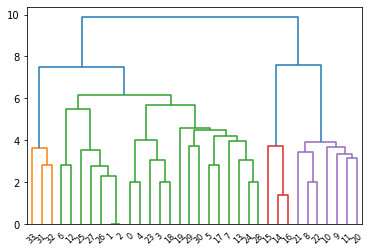

In [150]:
dend = shc.dendrogram(shc.linkage(encoder_df, method='ward'))

In [151]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(c_preds):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
18,Invitation,Decider,No,Known,Governance Token,Investing or Fund Raising,Singular,ERC20,Yes,Invitation,...,Manual,Whitelist,No,Tokens Owned,None,Very,No,Investment Returns,No,Yes
19,Token Ownership,Decider,No,Known,Other Tokens,Investing or Fund Raising,Singular,ERC20,Yes,Token + Application,...,Manual,None,No,Tokens Owned,None,Very,No,Investment Returns,NaN,NaN
20,Invitation,Decider,No,Known,Governance Token,Investing or Fund Raising,Singular,ERC20,Yes,Invitation,...,Manual,None,No,Tokens Owned,None,Very,No,Investment Returns,No,Yes


In [162]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(kmeans_model.labels_):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale,PCA,Agglomerative
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Yes,Tokens Owned,None,None,Yes,Services,Yes,No,0,0
7,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,No,Tokens Owned,None,Very,Yes,Services,Yes,No,2,0
8,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,No,Tokens Owned,None,None,Yes,Services,Yes,No,0,0
11,Open,Decider,No,Anonymous,Other Tokens,Product Building and Management,Singular,ERC20,Yes,Ownership,...,No,Tokens Owned,None,Some,No,Investment Returns,No,No,1,0
22,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,No,Tokens Owned,None,Very,No,Services,Yes,Yes,0,0
35,Open,Community,No,Pseudonymous,REP Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,No,#Tokens Owned,None,Very,Yes,Services,Yes,No,2,3
36,Open,Community,Yes,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,Yes,Ownership,...,No,#Tokens Owned,None,Very,Yes,Services,Yes,No,2,3
37,Open,Decider,Yes,Pseudonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Yes,Per Individual,None,Very,Yes,Services,Yes,No,2,3


In [152]:
one_df.mode()

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
0,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,No,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN


In [153]:
per_zero = int(np.floor(len(zero_df)/34*100))
per_one = int(np.floor(len(one_df)/34*100))
per_two = int(np.floor(len(two_df)/34*100))
per_three = int(np.floor(len(three_df)/34*100))

In [154]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

,Cluster1: 50,Cluster2: 26,Cluster3: 14,Cluster4: 8
3,,,,
Access,Open,Token Ownership,Open,Invitation
Type,Profit from Tokens,Community,Community,Decider
Is hierachical,No,No,No,No
Anonymity,Pseudonymous,Pseudonymous,Pseudonymous,Known
Contributor Rewards,Governance Token,Other Tokens,Governance Token,Governance Token
Purpose,Product Building and Management,Community Building and Engagement,Product Building and Management,Investing or Fund Raising
Token Type,Singular,Singular,Singular,Singular
Primary Type,ERC20,ERC20,ERC20,ERC20
Supply Cap,Yes,Yes,Yes,Yes


In [155]:
final_df.to_excel('output_1.xlsx', sheet_name='Danke_Ingo')

In [164]:
df['PCA'] = c_preds
df['Agglomerative'] = clustering.labels_
df['KMeans'] = kmeans_model.labels_
df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale,PCA,Agglomerative,KMeans
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,Yes,Services,Yes,No,0,0,3
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,Yes,Services,No,Yes,0,0,0
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,Yes,Services,No,Yes,0,0,0
7,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,Very,Yes,Services,Yes,No,2,0,3
8,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,Yes,Services,Yes,No,0,0,3
9,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,Yes,Ownership,...,Tokens Owned,None,Some,No,Services,No,Yes,0,0,0
10,Open,Community,No,Pseudonymous,Other Tokens,Product Building and Management,Singular,ERC20,No,Ownership,...,Tokens Owned,None,Very,No,Token Sales,Yes,No,2,0,0
11,Open,Decider,No,Anonymous,Other Tokens,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,Some,No,Investment Returns,No,No,1,0,3
12,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,No,Token Sales,Yes,No,1,1,2
13,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Tokens Owned,None,None,No,NaN,NaN,NaN,1,1,2
